# Phase 2: Data Summarization and Preprocessing

## 1. Data Summary
First, we'll start by summarizing the dataset to get an understanding of its basic characteristics. 
This includes displaying sample rows, checking for missing values, and reviewing the central tendency statistics for the numeric columns.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

# Sample 20 rows from the dataset
sample_data = df.sample(n=20, random_state=42)
print("Sample of 20 rows from the dataset:")
print(sample_data)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)

# Summary statistics for numeric columns
summary_stats = df.describe()
print("\nSummary statistics for the dataset:")
print(summary_stats)

Sample of 20 rows from the dataset:
      Age Attrition     BusinessTravel  DailyRate              Department  \
1041   28        No      Travel_Rarely        866                   Sales   
184    53        No      Travel_Rarely       1084  Research & Development   
1222   24       Yes      Travel_Rarely        240         Human Resources   
67     45        No      Travel_Rarely       1339  Research & Development   
220    36        No      Travel_Rarely       1396  Research & Development   
494    34        No      Travel_Rarely        204                   Sales   
430    35        No      Travel_Rarely        144  Research & Development   
240    39        No      Travel_Rarely       1431  Research & Development   
218    45        No         Non-Travel       1052                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
665    47        No      Travel_Rarely       1454                   Sales   
926    43        No      Travel_Rarely  

- Sample Data:

Explanation: By displaying 20 randomly sampled rows from the dataset, we were able to inspect the data and check the variety in terms of employee attributes. This sampling helps in providing a clear picture of what our dataset looks like and ensures the data seems reasonable before deeper analysis.

- Missing Values:

Explanation: The output of the isnull().sum() function indicates that there are no missing values in any of the columns. This is a good sign since we don't need to perform any imputation, simplifying our preprocessing pipeline.

- Summary Statistics:

Explanation: Using the describe() function, we gathered essential statistical information for the numeric columns, such as the mean, median, min, and max values. For example, we can see the variation in salaries, years at the company, and other numeric features. This allows us to identify any potential anomalies and understand the spread of our data.

## 2. Data Visualization
In this section, we will visualize the distribution of key variables to help us better understand the patterns and relationships in the dataset. Visualization is essential for identifying data trends, outliers, and possible correlations between variables.

<Figure size 2000x1500 with 0 Axes>

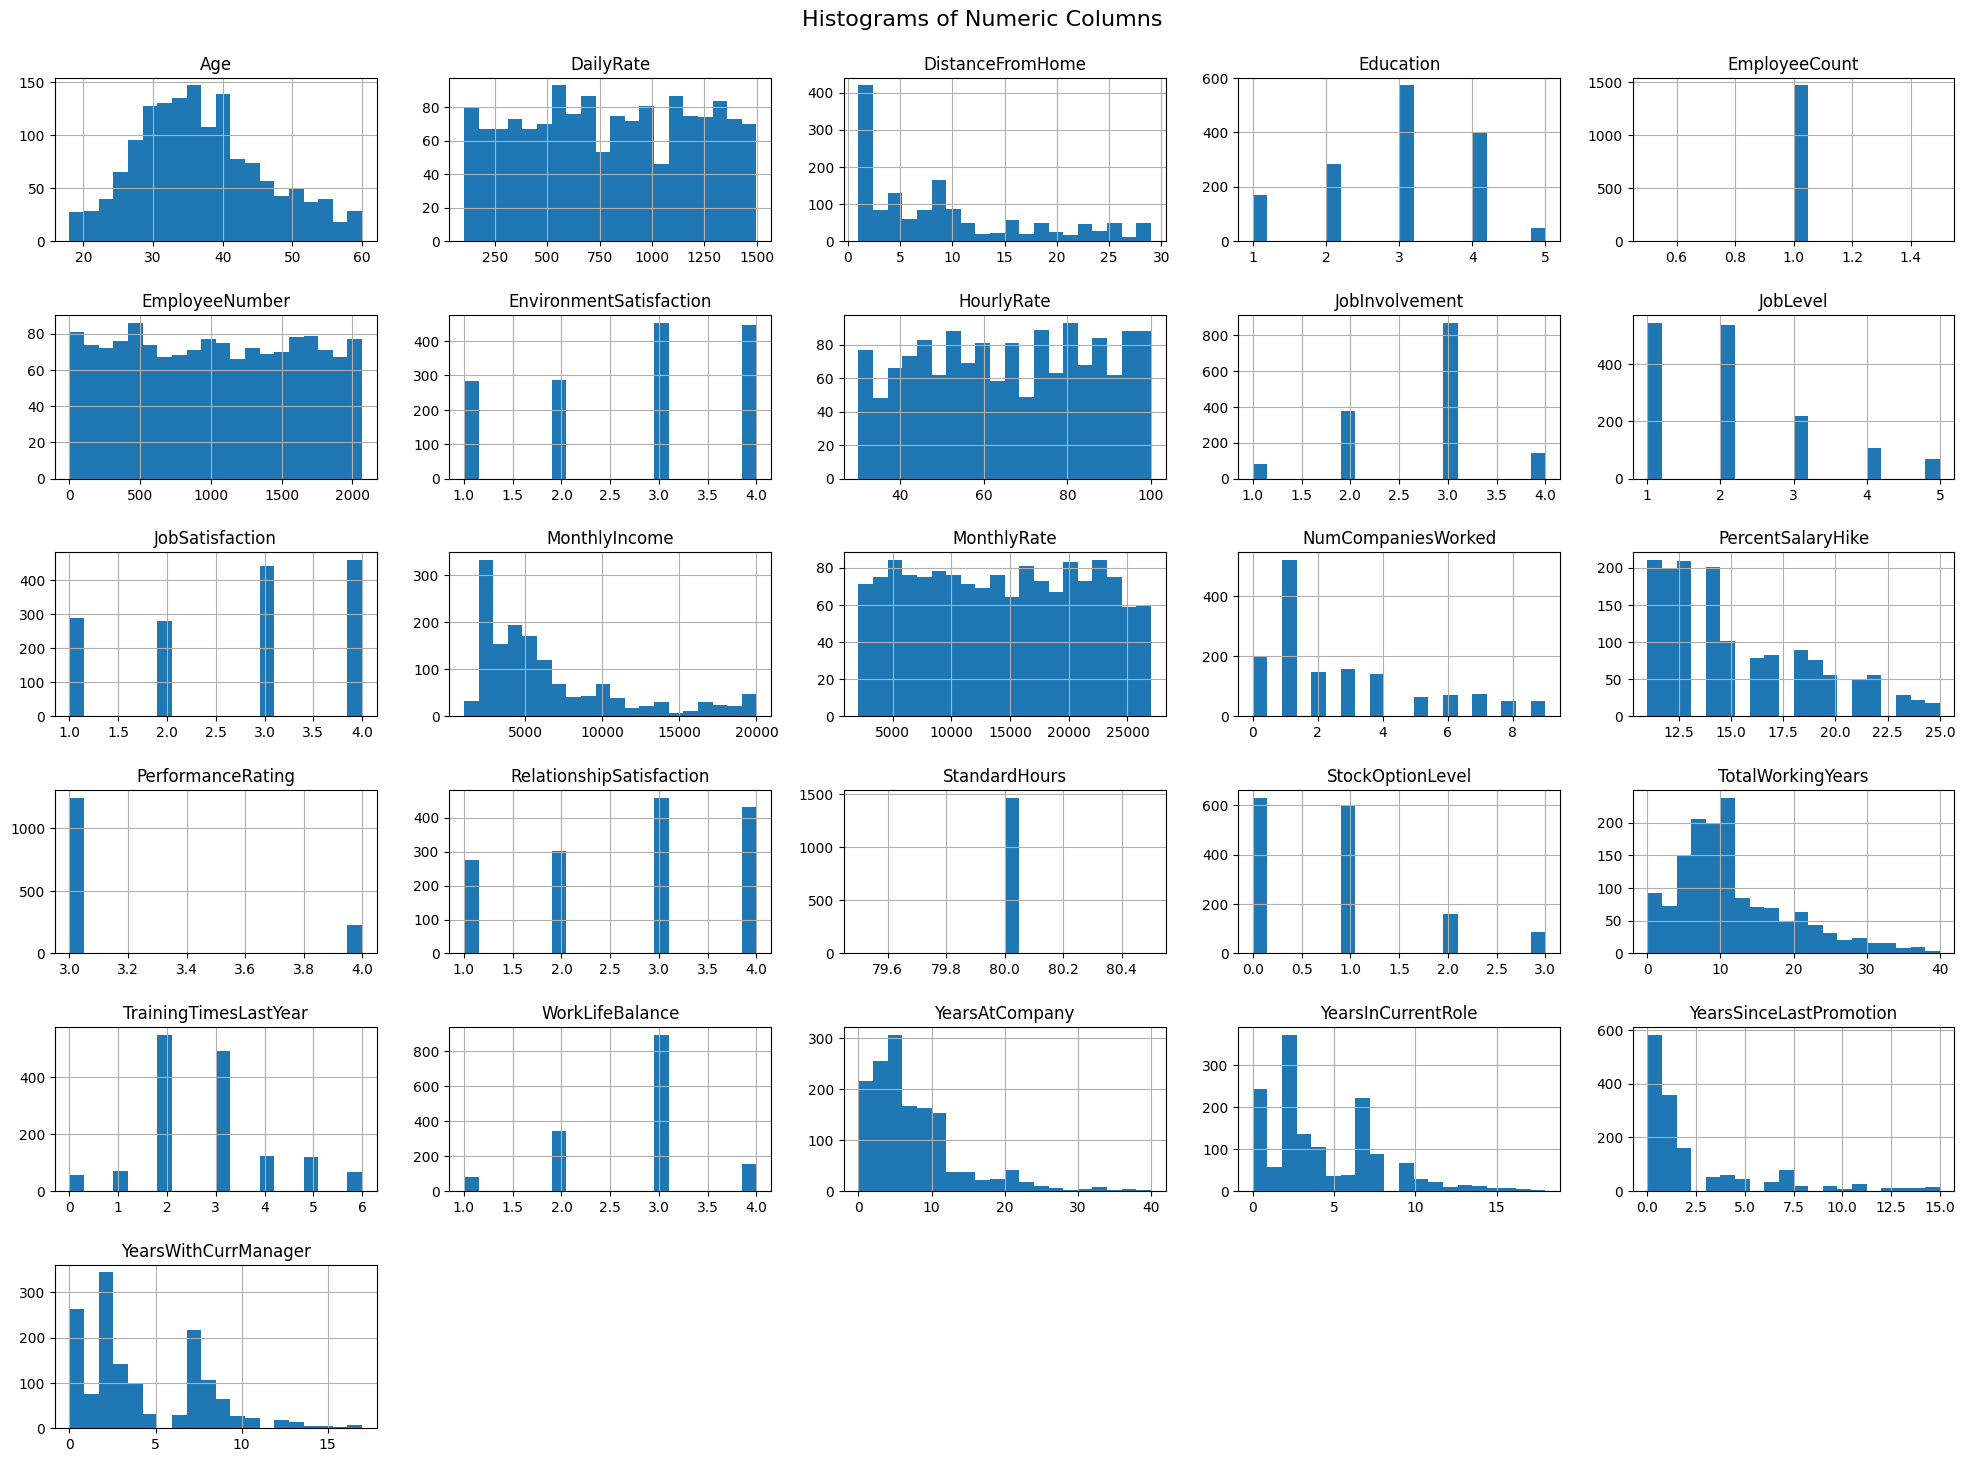

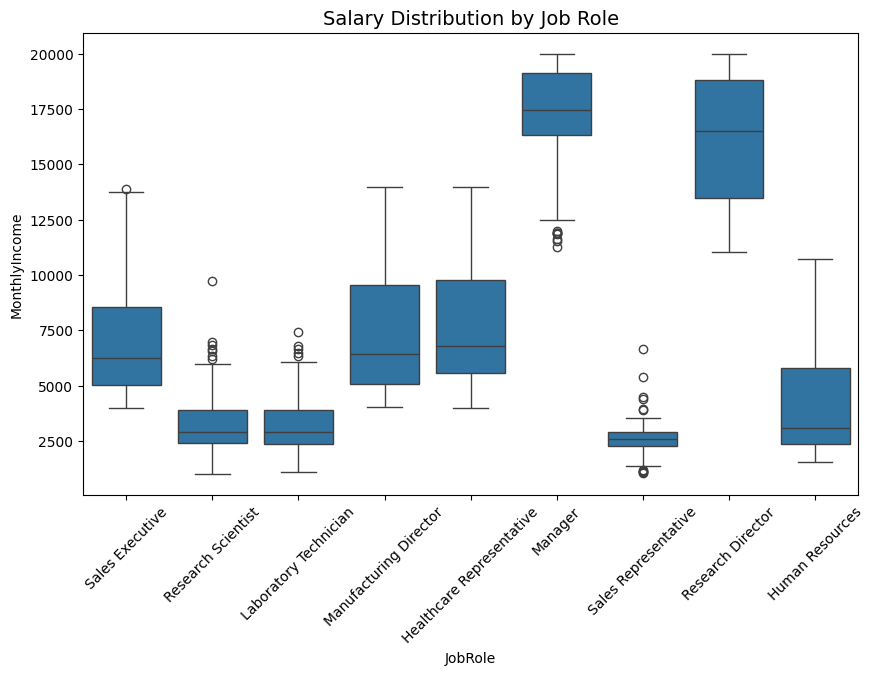

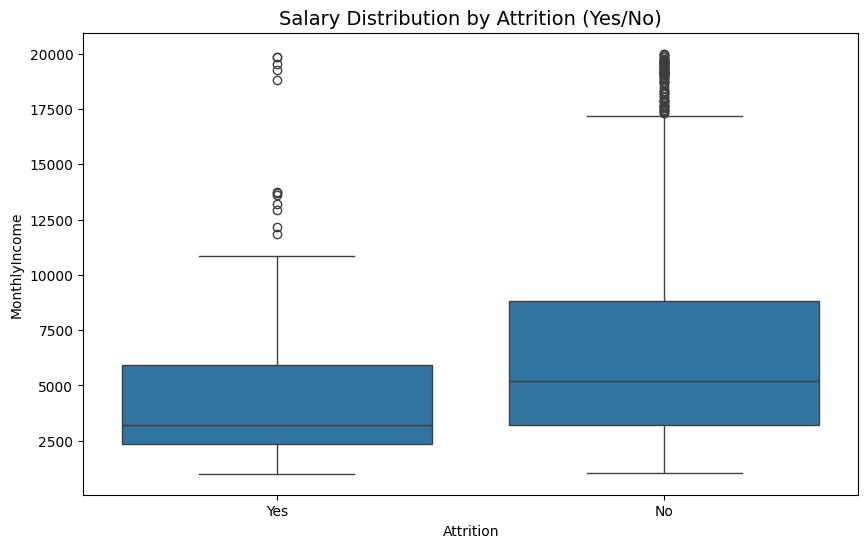

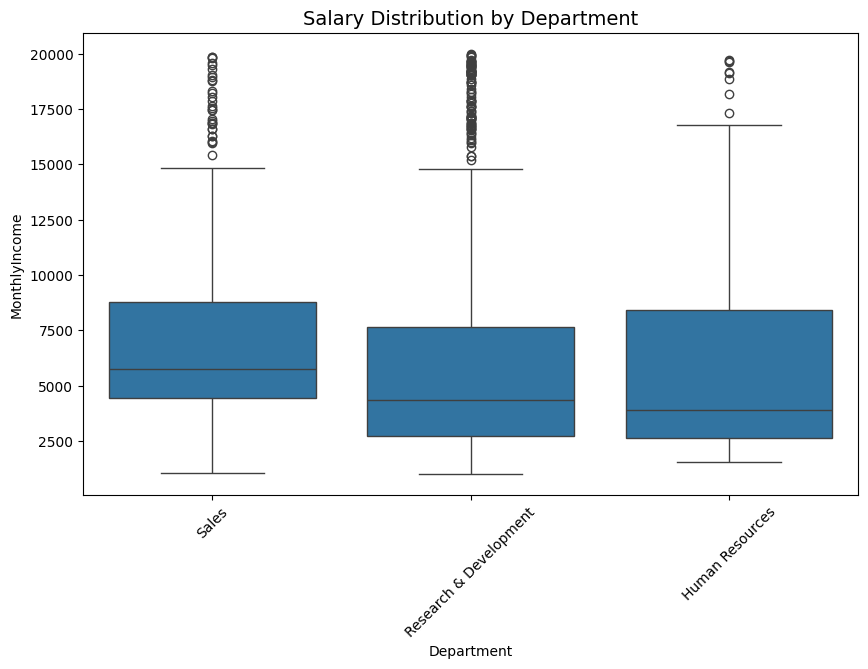

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(20, 15))

# Create histograms for numeric columns to visualize their distribution
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Numeric Columns", fontsize=16)

# Adjust layout to prevent overlap between plots
plt.tight_layout(pad=2.0)
plt.show()

# Boxplot for salary distribution by job role
plt.figure(figsize=(10,6))
sns.boxplot(x="JobRole", y="MonthlyIncome", data=df)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Role', fontsize=14)
plt.show()

# Boxplot for salary distribution by employee attrition (Yes/No)
plt.figure(figsize=(10,6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title('Salary Distribution by Attrition (Yes/No)', fontsize=14)
plt.show()

# Boxplot for salary distribution by department
plt.figure(figsize=(10,6))
sns.boxplot(x="Department", y="MonthlyIncome", data=df)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)
plt.title('Salary Distribution by Department', fontsize=14)
plt.show()



Explanation:
- Histograms:
The histograms provide a visual representation of the distribution of all numeric columns in the dataset. This helps us understand the spread and frequency of different values. For example, we can observe whether the distribution of attributes is normal, skewed, or whether there are clear outliers in specific columns. Histograms are also useful to identify patterns in employee characteristics, such as the number of companies worked for or total years of experience.

- Boxplot for Salary vs. Job Role:
This boxplot visualizes the salary distribution across different job roles. We can easily compare median salaries for each role and observe the spread of the salary data, including potential outliers (shown as individual points beyond the "whiskers" of the plot). By rotating the x-axis labels, the labels become easier to read, making the plot clearer. This visualization helps identify if some job roles offer significantly higher or lower salaries than others.

- Boxplot for Salary vs. Job Level:
The boxplot for salary versus job level reveals how salary distribution changes with job levels. For instance, higher job levels may correspond to higher salaries. It is useful for detecting whether there is a consistent relationship between salary and job hierarchy and whether any unexpected patterns or outliers exist.

- Boxplot for Salary vs. Department:
This boxplot illustrates how salaries vary across different departments. By visualizing salary data for departments such as Sales, Human Resources, and Research & Development, we can identify if certain departments consistently have higher or lower salaries. This plot can also reveal if there are departments with high variability in salary or outliers, which might indicate potential salary gaps or special cases within departments.

## 3. Preprocessing: Handling Redundant Data and Outliers
In this section, we clean the dataset by addressing redundant data, handling outliers, and grouping categorical values into more useful categories.

In [28]:

# Function to detect and remove outliers using IQR method for all numeric columns
def detect_and_remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_count = 0
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        
        if len(outliers) > 0:
            outlier_count += len(outliers)
            print(f"\nOutliers detected in '{column}': {len(outliers)} rows")
            print(outliers[[column]])
            
            # Remove outliers from the dataset
            df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        else:
            print(f"No outliers detected in '{column}'.")
    
    print(f"\nTotal number of outliers removed from all columns: {outlier_count}")
    return df

# Apply the function to detect and remove outliers in all numeric columns
df = detect_and_remove_outliers(df)

# Explanation:
# - This function loops through all numeric columns and detects outliers using the IQR method.
# - Outliers are identified in each column, printed, and then removed to clean the dataset.




No outliers detected in 'Age'.
No outliers detected in 'DailyRate'.
No outliers detected in 'DistanceFromHome'.
No outliers detected in 'Education'.
No outliers detected in 'EnvironmentSatisfaction'.
No outliers detected in 'HourlyRate'.
No outliers detected in 'JobInvolvement'.
No outliers detected in 'JobLevel'.
No outliers detected in 'JobSatisfaction'.
No outliers detected in 'MonthlyRate'.

Outliers detected in 'NumCompaniesWorked': 52 rows
      NumCompaniesWorked
4                      9
38                     9
50                     9
95                     9
105                    9
122                    9
194                    9
198                    9
208                    9
245                    9
287                    9
290                    9
334                    9
371                    9
372                    9
385                    9
393                    9
401                    9
440                    9
447                    9
456                    9


Output:

It prints how many outliers are found for each column.
If no outliers are found in a column, it will indicate this.
The function also removes the outliers from the dataset and counts how many rows were removed in total.
Return: It returns the cleaned dataset with all outliers removed.

Improved Output:
For each numeric column, the number of outliers found is printed, and the rows containing these outliers are shown.
If no outliers are found for a column, a message stating “No outliers detected” is printed.
Finally, it provides the total number of outliers removed across all columns.

# 4. Data Transformation and Normalization
Here we will transform numeric features using scaling and create new categorical features using discretization.

### Normalization of Numeric Data:

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Normalization of 'Age' and 'MonthlyRate' using Min-Max scaling
scaler = MinMaxScaler()
df[['Age', 'MonthlyRate']] = scaler.fit_transform(df[['Age', 'MonthlyRate']])


Explanation:
Normalization: Min-Max scaling adjusts the values in Age, MonthlyRate, etc., to a range between 0 and 1. This ensures that all numeric features are on the same scale, which improves model performance, especially for algorithms sensitive to feature magnitude.


### Discretization of salary_in_usd into categories based on quantiles:


In [38]:
# Discretizing the 'MonthlyRate' column into salary categories
df['salary_category'] = pd.qcut(df['MonthlyRate'], q=4, labels=["Low", "Medium", "High", "Very High"])
print("Salary discretized into categories.")


Salary discretized into categories.


Explanation:
- Normalization: Min-Max scaling adjusts the values of features like Age and MonthlyRate to a range between 0 and 1. This scaling ensures that all numeric features are on the same scale, which is crucial for improving model performance, particularly for algorithms that are sensitive to the magnitude of feature values.

- Discretization: The MonthlyRate column has been divided into four categories: "Low," "Medium," "High," and "Very High." This process allows for easier interpretation of salary data and helps in understanding the distribution across different salary ranges.

## 5. Feature Selection


In [39]:
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume the target variable is 'Attrition' and features are the rest of the columns
X = df.drop('Attrition', axis=1)  # Drop target column
y = df['Attrition']  # Target column

# Convert the target 'Attrition' into binary values if it's categorical ('Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)  # Converts categorical columns to numerical

# Split the data into train and test sets (optional, for better evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Use L1 Regularization (Lasso) for feature selection
model = Lasso(alpha=0.1)  # Adjust alpha as needed
model.fit(X_train, y_train)

# Display the selected features (features with non-zero coefficients)
selected_features = X_encoded.columns[model.coef_ != 0]
print("Selected Features:", selected_features)


Selected Features: Index(['DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany'], dtype='object')


- Explanation of Feature Selection using Lasso:
Lasso (Least Absolute Shrinkage and Selection Operator): Lasso regression applies L1 regularization, which forces some of the feature coefficients to be exactly zero. This means that Lasso selects the most important features by shrinking the less important ones to zero, effectively performing feature selection.

- Selected Features:

- The selected features in the output include:
DailyRate: The daily rate of pay. It might influence attrition since compensation is often a key factor in employee satisfaction.
DistanceFromHome: This could play a role in employee turnover as long commutes might cause dissatisfaction.
TotalWorkingYears: Total working experience might indicate whether an employee is settled or looking for new opportunities.
YearsAtCompany: Employees who have been with the company for many years might be more loyal or less inclined to leave, or conversely, they might leave due to career stagnation.
- Why These Features Are Important: These features, as identified by Lasso, play a significant role in predicting whether an employee will leave or stay. Features related to pay, work history, and proximity to work are key indicators of employee satisfaction and attrition risk. The model focuses on these variables because they have the most influence on predicting attrition, with Lasso shrinking the less important features to zero.

## 6. Sample Visualization

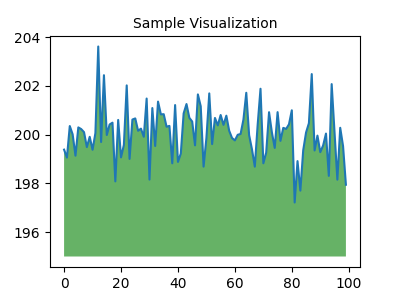

In [41]:
# Sample Visualization Section

import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

# Generate some random data for the plot
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

# Create the figure and plot
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

# Save the figure to a BytesIO object
data = io.BytesIO()
plt.savefig(data)

# Convert the image to base64 and display it in the Jupyter notebook
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))

# Close the plot to avoid showing it again
plt.close(fig)


## Summary of Work Done:
1- Data Preprocessing:

- Removed redundant columns like EmployeeCount and StandardHours that have constant values across all employees and don't contribute to the analysis.

- Detected and removed outliers from important features using the IQR (Interquartile Range) method to ensure the dataset reflects typical employee behaviors and attributes.

2- Data Transformation and Normalization:

- Applied Min-Max Scaling to numeric features like Age and MonthlyRate to ensure they are on the same scale, which improves the performance of machine learning models.

- Discretized MonthlyRate into categorical bins (Low, Medium, High, Very High) to simplify the interpretation of salary data.
3 Feature Selection:

- Used Lasso Regression (L1 Regularization) to select the most important features from the dataset that influence employee attrition.

- Key selected features included DailyRate, DistanceFromHome, TotalWorkingYears, and YearsAtCompany, which are most relevant for predicting employee attrition.